# Pymaceuticals Inc.
---

### Analysis

- The Capomulin and Ramicane drug regimen were used in most mice treatment. Both Capomulin and Ramicane have showed to be more effective compared to other treatments to reduce the tumor size.
- Capomulin has the smallest tumor volume variance compared to the other three drug treatments analyzed.
- There is a strong correlation between the mouse weight and the average tumor volume. The correlation between mouse weight and the average tumor volume is 0.84.
- The male population is slightly higher compared to the female mice, with 51% vs 49%.
- The drug treatment that appears to be the least effective is Ketapril, with a higher mean tumor volume and largest tumor volume variance.
 

In [93]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how='outer')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [94]:
# Checking the number of mice.
mouse_count = mouse_study_df['Mouse ID'].nunique()
mouse_count

249

In [95]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = mouse_study_df.loc[mouse_study_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [96]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] == 'g989', :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [97]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_mice_id)==False]
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [98]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_df['Mouse ID'].nunique()
clean_mouse_count

248

## Summary Statistics

In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).mean()
median = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).median()
var = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).var()
std = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).std()
sem = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
mouse_stat = pd.DataFrame({'Mean Tumor Volume':mean, 
                           'Median Tumor Volume':median, 
                           'Tumor Volume Variance':var, 
                           'Tumor Volume Std. Dev.':std, 
                           'Tumor Volume Std. Err.':sem})
mouse_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [100]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
mouse_stat_agg = clean_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
mouse_stat_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

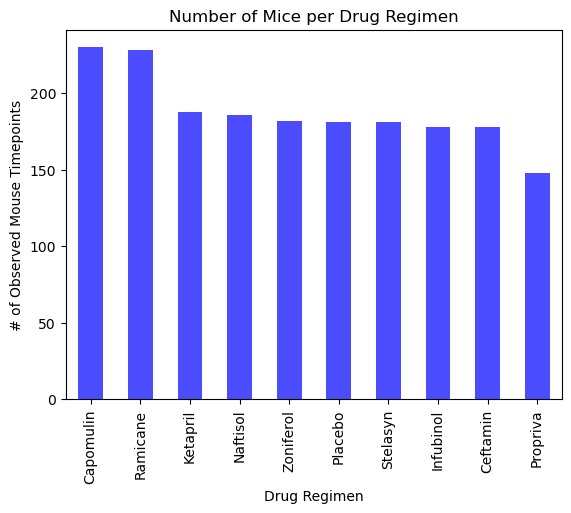

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of mice for each drug regimen
mice_count = clean_mouse_df['Drug Regimen'].value_counts()

# Plot the bar chart
mice_count.plot(kind='bar', color='b', alpha=0.7)

# Add title and labels
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

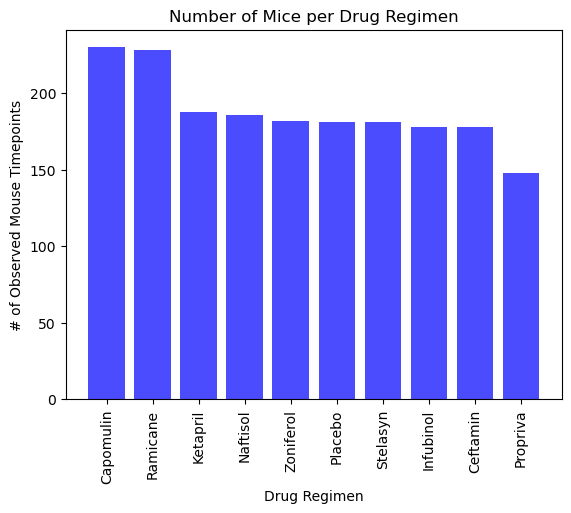

In [102]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Plot the Pyplot bar chat based on the x and y axis
plt.bar(x_axis, y_axis, color='b', alpha=0.7)

# Add title and labels
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

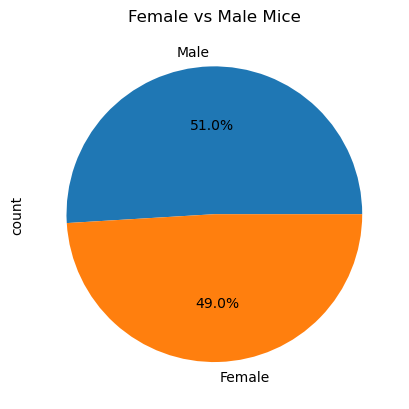

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of mice for each sex
gender_count = clean_mouse_df['Sex'].value_counts()

# Plot the pie plot
gender_count.plot.pie(autopct= '%1.1f%%')

# Add title and labels
plt.title('Female vs Male Mice')
plt.show()

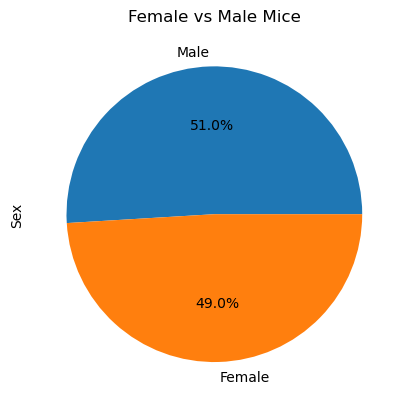

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Assign labels and size
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]

# Plot the pie plot
plot = gender_count.plot.pie(y='Total Count', autopct='%1.1f%%')

# Add title and labels
plt.title('Female vs Male Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [109]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs = clean_mouse_df[clean_mouse_df["Drug Regimen"].isin(drug_list)]
drugs.head()

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(['Drug Regimen', 'Mouse ID']).last()
new_last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drugs_last_tp = new_last_timepoint[['Drug Regimen', 'Tumor Volume (mm3)']]

capomulin_df = drugs_last_tp.loc[drugs_last_tp['Drug Regimen'] == 'Capomulin']
ramicane_df = drugs_last_tp.loc[drugs_last_tp['Drug Regimen'] == 'Ramicane']
infubinol_df = drugs_last_tp.loc[drugs_last_tp['Drug Regimen'] == 'Infubinol']
ceftamin_df = drugs_last_tp.loc[drugs_last_tp['Drug Regimen'] == 'Ceftamin']

drugs_df = pd.DataFrame({'Capomulin': capomulin_df['Tumor Volume (mm3)'],
         'Ramicane': ramicane_df['Tumor Volume (mm3)'],
          'Infubinol': infubinol_df['Tumor Volume (mm3)'],
          'Ceftamin': ceftamin_df['Tumor Volume (mm3)']})
#drugs_df

In [110]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in drugs_last_tp['Drug Regimen']:
    if drug not in treatment:
        treatment.append(drug)
treatment

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
upperq_list = []
lowerq_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:    
    quartiles = drugs_df[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    print(f'The lower quartile of {drug} treatments is: {lowerq}')
    print(f'The upper quartile of {drug} treatments is: {upperq}')
    print(f'The interquartile range of {drug} treatments is: {iqr}')
    print(f'Values below {lower_bound} could be {drug} outliers.')
    print(f'Values above {upper_bound} could be {drug} outliers.')
    print(f'-----------------------------------------------------')
    

The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
-----------------------------------------------------
The lower quartile of Ceftamin treatments is: 48.72
The upper quartile of Ceftamin treatments is: 64.3
The interquartile range of Ceftamin treatments is: 15.58
Values below 25.35 could be Ceftamin outliers.
Values above 87.67 could be Ceftamin outliers.
-----------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
-----------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper qua

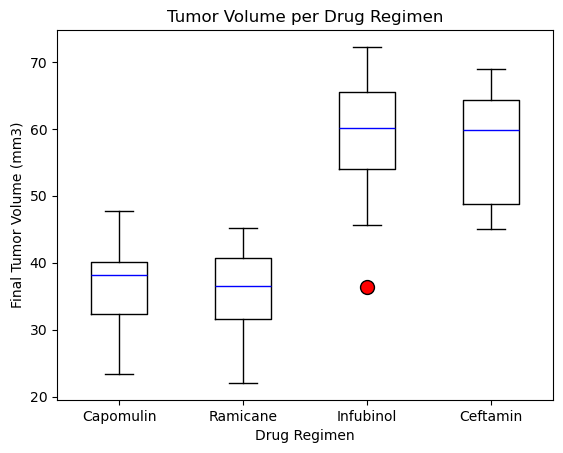

In [127]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier = dict(markerfacecolor='red', markersize=10)
boxplot = drugs_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'), flierprops=outlier)

plt.xlabel('Drug Regimen')
plt.xticks([1,2,3,4], drug_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume per Drug Regimen')
plt.show()

## Line and Scatter Plots

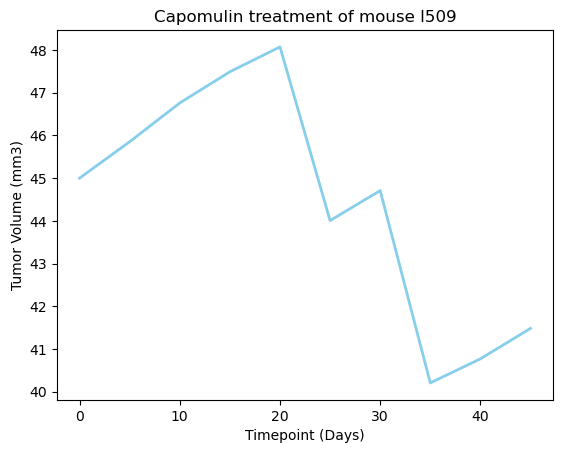

In [128]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_single_df = clean_mouse_df.loc[(clean_mouse_df['Drug Regimen'] == 'Capomulin') & (clean_mouse_df['Mouse ID'] == 'l509')]
capomulin_single_df.head()
x_axis = capomulin_single_df['Timepoint']
tumsiz = capomulin_single_df['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15, color='skyblue')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

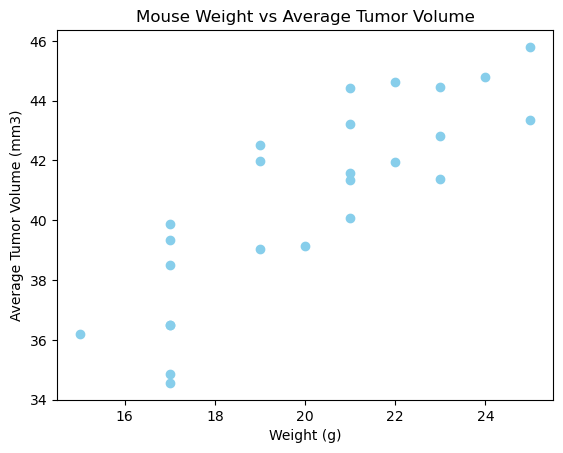

In [129]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = clean_mouse_df.loc[(clean_mouse_df['Drug Regimen'] == 'Capomulin')]
mouse_capomulin_df = new_capomulin_df.groupby('Mouse ID')

# Store the average tumor volume for each weight
avg_tumor_vol = mouse_capomulin_df[('Tumor Volume (mm3)')].mean()
avg_weight = mouse_capomulin_df['Weight (g)'].mean()
avg_capomulin_df = pd.DataFrame({'Weight (g)': avg_weight,
                                 'Tumor Volume (mm3)': avg_tumor_vol})

# Plot the graph
plt.scatter(avg_weight, avg_tumor_vol, color="skyblue")
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


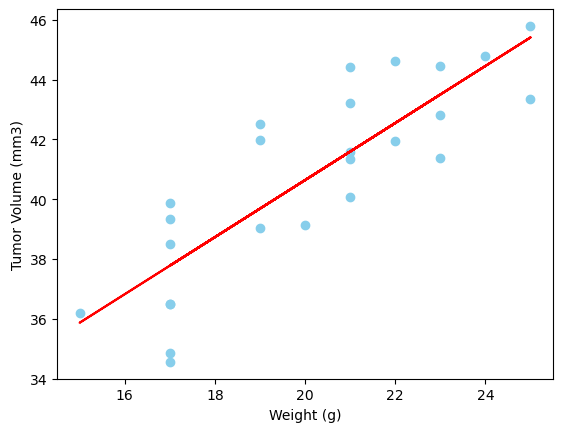

In [130]:
# Calculate the correlation coefficient and a linear regression model
correlation = st.pearsonr(avg_weight, avg_tumor_vol)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values=avg_capomulin_df['Weight (g)']
y_values=avg_capomulin_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.scatter(x_values, y_values, color='skyblue')
plt.plot(x_values, regress_values, 'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()